In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [2]:
import pyodbc
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DJO;'
                      'Database=transportSA;'
                      'Trusted_Connection=yes;')

C = pd.read_sql_query('SELECT cast(CODE_STIF_TRNS as numeric) as CODE_STIF_TRNS  , cast(CAT_JOUR as numeric) as CAT_JOUR , TRNC_HORR_60 , pourc_validations From surfaceSA',conn)

from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=DataConversionWarning)

In [3]:
C

,CODE_STIF_TRNS,CAT_JOUR,TRNC_HORR_60,pourc_validations
0,100.0,0.0,10H-11H,"5,4"
1,100.0,1.0,23H-0H,1
2,100.0,0.0,2H-3H,"0,01"
3,100.0,0.0,10H-11H,"5,63"
4,100.0,1.0,6H-7H,"3,08"
...,...,...,...,...
65530,100.0,0.0,22H-23H,"1,02"
65531,100.0,0.0,14H-15H,"4,86"
65532,100.0,0.0,8H-9H,"9,8"
65533,100.0,0.0,10H-11H,"5,4"


In [4]:
CH = C[['CODE_STIF_TRNS','CAT_JOUR','TRNC_HORR_60','pourc_validations']]

In [5]:
CH

,CODE_STIF_TRNS,CAT_JOUR,TRNC_HORR_60,pourc_validations
0,100.0,0.0,10H-11H,"5,4"
1,100.0,1.0,23H-0H,1
2,100.0,0.0,2H-3H,"0,01"
3,100.0,0.0,10H-11H,"5,63"
4,100.0,1.0,6H-7H,"3,08"
...,...,...,...,...
65530,100.0,0.0,22H-23H,"1,02"
65531,100.0,0.0,14H-15H,"4,86"
65532,100.0,0.0,8H-9H,"9,8"
65533,100.0,0.0,10H-11H,"5,4"


In [6]:
C= CH.drop(CH.index [65537:524278],axis=0)

In [7]:
C["TRNC_HORR_60"]=C["TRNC_HORR_60"].map({"7H-8H":0, "8H-9H":1,"18H-19H":2, "17H-18H":3,"16H-17H":4,"6H-7H":5,"9H-10H":6,"12H-13H":7,"13H-14H":8,"15H-16H":9,"19H-20H":10,"11H-12H":11,"14H-15H":12,"10H-11H":14,"20H-21H":15,"5H-6H":16,"21H-22H":17,"22H-23H":18,"23H-0H":17,"0H-1H":18,"4H-5H":19,"1H-2H":20,"2H-3H":21,"3H-4H":22}) #convert Gender values into numerical

In [8]:
C.drop(524278,axis=0,inplace=True)

KeyError: '[524278] not found in axis'

In [ ]:
C

In [9]:
C.drop(524279,axis=0,inplace=True)

KeyError: '[524279] not found in axis'

In [10]:
CH =C

In [11]:
CH


,CODE_STIF_TRNS,CAT_JOUR,TRNC_HORR_60,pourc_validations
0,100.0,0.0,14,"5,4"
1,100.0,1.0,17,1
2,100.0,0.0,21,"0,01"
3,100.0,0.0,14,"5,63"
4,100.0,1.0,5,"3,08"
...,...,...,...,...
65530,100.0,0.0,18,"1,02"
65531,100.0,0.0,12,"4,86"
65532,100.0,0.0,1,"9,8"
65533,100.0,0.0,14,"5,4"


In [12]:
X = C.iloc[:, 0:3]
y = C.iloc[:, 3:4]

In [13]:
X

,CODE_STIF_TRNS,CAT_JOUR,TRNC_HORR_60
0,100.0,0.0,14
1,100.0,1.0,17
2,100.0,0.0,21
3,100.0,0.0,14
4,100.0,1.0,5
...,...,...,...
65530,100.0,0.0,18
65531,100.0,0.0,12
65532,100.0,0.0,1
65533,100.0,0.0,14


In [14]:
y

,pourc_validations
0,"5,4"
1,1
2,"0,01"
3,"5,63"
4,"3,08"
...,...
65530,"1,02"
65531,"4,86"
65532,"9,8"
65533,"5,4"


In [15]:
len(y)

65535

In [16]:
y.value_counts()

pourc_validations
0                    879
0,01                 710
0,02                 452
0,03                 375
0,05                 321
                    ... 
32,37                  1
32,35                  1
32,33                  1
32,32                  1
98,31                  1
Length: 3300, dtype: int64

In [17]:
y.describe()

,pourc_validations
count,65535
unique,3300
top,0
freq,879


In [18]:
for i in range (len(y)):
    y['pourc_validations'][i]=y['pourc_validations'][i].replace(',','.')
    y['pourc_validations'][i]=float(y['pourc_validations'][i])   
print(y['pourc_validations'].mean())

C:\Users\jihed\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


6.550895857175619


In [154]:

    
for i in range (len(y)):
    if y['pourc_validations'][i]>6.54:
        y['pourc_validations'][i]=0
        print(y['pourc_validations'][i])
    else:
        y['pourc_validations'][i]=1
        print(y['pourc_validations'][i])

1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
1
1
1
1
0
1
1
0
1
0
0
1
0
1
1
1
1
1
1
0
1
1
1
1
0
0
1
1
0
1
1
0
1
1
1
1
0
1
0
1
1
1
0
1
1
1
1
1
0
1
1
1
0
1
0
0
1
1
1
0
1
1
0
1
1
1
1
0
1
0
1
0
1
1
0
1
1
1
1
0
0
0
0
1
1
0
0
1
1
1
1
1
1
0
1
1
0
1
0
1
1
0
1
0
0
0
1
0
0
1
0
0
1
0
1
1
0
0
1
0
0
1
1
0
1
0
1
1
0
1
1
0
0
1
1
1
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
0
1
1
0
1
0
1
1
1
1
0
0
0
0
0
1
0
1
1
1
1
0
0
1
1
1
1
1
1
0
1
0
1
0
1
0
1
1
1
1
1
0
1
1
1
1
0
1
1
0
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
0
0
0
1
1
1
0
1
0
0
1
1
1
1
1
0
1
1
1
1
1
1
0
0
1
1
0
0
1
0
1
1
1
1
0
0
1
1
1
0
0
0
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
0
1
1
1
1
1
1
1
0
1
1
1
1
1
0
1
1
0
0
0
0
1
1
1
1
1
1
1
0
1
0
1
1
1
0
0
0
1
1
0
0
0
0
0
1
0
0
1
0
1
1
0
1
0
1
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
1
1
0
0
1
0
1
1
1
1
1
1
0
1
0
1
1
1
0
1
1
1
0
1
0
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
0
0
1
0
1
1
1
1
1
1
1
1
0
0
1
0
0
1
0
1
0
0
0
0
1
1
0
1
0
0
0
1
0
0
1
0
1
0
0
1
1
0
0
0
0
1
1
1
1
1
1
0
0
1
0
1
0
0
1
1
1
1
0
0
1
0
1
0
0
0
0
1


In [155]:
print(x.mean())

Series([], dtype: float64)


In [156]:
y['pourc_validations'].value_counts()

1    39146
0    26391
Name: pourc_validations, dtype: int64

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [158]:
X_test

,CODE_STIF_TRNS,CAT_JOUR,TRNC_HORR_60
52973,350.0,2.0,10
26836,6.0,0.0,0
34921,100.0,1.0,17
41002,65.0,0.0,2
55376,21.0,2.0,11
...,...,...,...
64434,45.0,1.0,6
31672,100.0,2.0,15
29516,51.0,3.0,0
32274,210.0,1.0,0


In [159]:
y_test

,pourc_validations
52973,0
26836,0
34921,1
41002,0
55376,0
...,...
64434,1
31672,1
29516,1
32274,0


In [160]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [161]:
X_train

array([[ 1.63477626,  0.89615716,  1.28930193],
       [-1.03185204,  0.89615716, -1.18085421],
       [-0.56981249, -1.21940967, -1.51020837],
       ...,
       [ 0.15624967, -1.21940967, -1.51020837],
       [ 1.63477626, -0.51422073, -0.68682298],
       [ 2.7040678 , -1.21940967, -0.68682298]])

In [162]:
y_train

,pourc_validations
47563,1
1095,0
42523,0
43158,0
4925,0
...,...
21243,1
45891,0
52416,0
42613,1


In [163]:
import math
math.sqrt(len(y_test))

114.49017425089369

In [164]:
y_train=y_train.astype('int')

In [165]:
y_test&=y_test.astype('int')

C:\Users\jihed\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k= 1 is: 0.8


C:\Users\jihed\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k= 2 is: 0.8


C:\Users\jihed\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k= 3 is: 0.8


C:\Users\jihed\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k= 4 is: 0.8


C:\Users\jihed\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k= 5 is: 0.8


C:\Users\jihed\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k= 6 is: 0.8


C:\Users\jihed\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k= 7 is: 0.8


C:\Users\jihed\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k= 8 is: 0.8


C:\Users\jihed\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k= 9 is: 0.8


C:\Users\jihed\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k= 10 is: 0.79


C:\Users\jihed\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k= 11 is: 0.78


C:\Users\jihed\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k= 12 is: 0.78


C:\Users\jihed\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k= 13 is: 0.74


C:\Users\jihed\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k= 14 is: 0.74


Text(0, 0.5, 'Testing Accuracy')

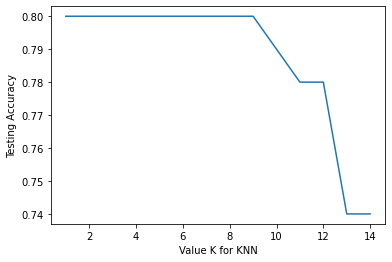

In [166]:
n_neighbors=15
scores=[]
for k in range(1,15):
 knn=KNeighborsClassifier(n_neighbors-k)
 knn.fit(X_train,y_train)
 y_pred=knn.predict(X_test)
 print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
 scores.append(round(accuracy_score(y_pred,y_test),2))
plt.plot(range(1,15),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')

K choice

In [167]:
classifier = KNeighborsClassifier(n_neighbors=8, p=2,metric='manhattan')

In [168]:
type(y_train['pourc_validations'][8])

numpy.int32

In [169]:
y_train=y_train.astype('int')

In [170]:
classifier.fit(X_train, y_train)

C:\Users\jihed\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='manhattan', n_neighbors=8)

In [171]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 0, 0])

In [172]:
type(y_train['pourc_validations'][8])

numpy.int32

In [173]:
y_test&=y_test.astype('int')

In [174]:
print(accuracy_score(y_test, y_pred))

0.7985962770826975


In [175]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[4344 1073]
 [1567 6124]]


In [176]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.73      0.80      0.77      5417
        True       0.85      0.80      0.82      7691

    accuracy                           0.80     13108
   macro avg       0.79      0.80      0.79     13108
weighted avg       0.80      0.80      0.80     13108

